In [1]:
import requests, zipfile
from io import StringIO
import io

In [2]:
# url='http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'
# r = requests.get(url, stream=True)
# z = zipfile.ZipFile(io.BytesIO(r.content))
# z.extractall()

In [3]:
import pandas as pd
import scipy as sp
import numpy as np


import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sns.set()
%matplotlib inline
%precision 3

from sklearn import linear_model

In [4]:
student_data_math = pd.read_csv('./data/student-mat.csv')

In [5]:
student_data_math.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [6]:
student_data_math = pd.read_csv('./data/student-mat.csv', sep=';')

In [7]:
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
student_data_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [9]:
student_data_math['sex'].head()

0    F
1    F
2    F
3    F
4    F
Name: sex, dtype: object

In [10]:
student_data_math['absences'].head()

0     6
1     4
2    10
3     2
4     4
Name: absences, dtype: int64

In [11]:
student_data_math.groupby('sex')['age'].mean()

sex
F    16.730769
M    16.657754
Name: age, dtype: float64

## 3.3 기술통계

### 3.3.1 히스토그램

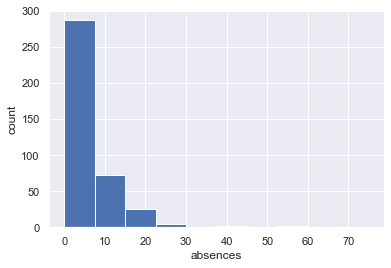

In [12]:
plt.hist(student_data_math['absences'])
plt.xlabel('absences')
plt.ylabel('count')
plt.grid(True)

In [13]:
print('평균값:', student_data_math['absences'].mean())

평균값: 5.708860759493671


In [14]:
print('중앙값', student_data_math['absences'].median())

중앙값 4.0


In [15]:
print('최빈값', student_data_math['absences'].mode())

최빈값 0    0
dtype: int64


In [16]:
student_data_math['absences'].var(ddof=0)

63.887389841371565

In [17]:
((student_data_math['absences'] - student_data_math['absences'].mean()) ** 2).sum() / len(student_data_math)

63.887389841371565

In [18]:
student_data_math['absences'].std(ddof=0)

7.99295876640006

In [19]:
np.sqrt(student_data_math['absences'].var(ddof=0))

7.99295876640006

### 3.3.4 요약 통계량과 백분위수

In [20]:
student_data_math['absences'].describe()['count']

395.0

In [21]:
student_data_math['absences'].describe()[6] - student_data_math['absences'].describe()[4]

8.0

In [22]:
student_data_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### 3.3.5 박스플롯 그래프

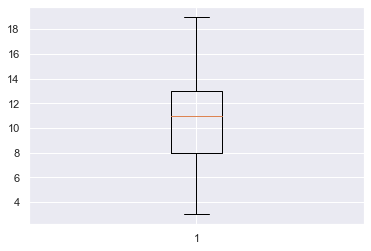

In [23]:
plt.boxplot(student_data_math['G1'])
plt.grid(True)

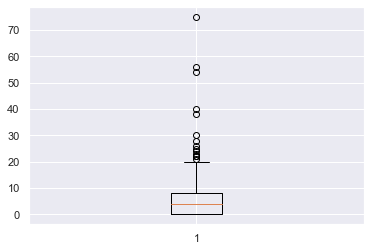

In [24]:
plt.boxplot(student_data_math['absences'])
plt.grid(True)

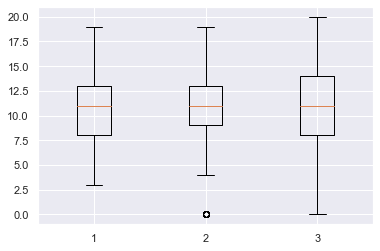

In [25]:
plt.boxplot([student_data_math['G1'], student_data_math['G2'], student_data_math['G3']])
plt.grid(True)

### 3.3.6 변동계수

변동계수 (coefficient variation, CV) : 표준편차를 평균값으로 나눈 값

In [26]:
student_data_math['absences'].std() / student_data_math['absences'].mean()

1.4018726369879073

In [27]:
student_data_math.std() / student_data_math.mean()

age           0.076427
Medu          0.398177
Fedu          0.431565
traveltime    0.481668
studytime     0.412313
failures      2.225319
famrel        0.227330
freetime      0.308725
goout         0.358098
Dalc          0.601441
Walc          0.562121
health        0.391147
absences      1.401873
G1            0.304266
G2            0.351086
G3            0.439881
dtype: float64

### 3.3.7 삼점도와 상관계수

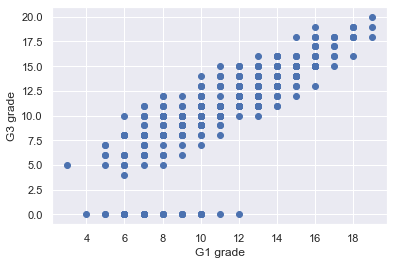

In [28]:
plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')
plt.ylabel('G3 grade')
plt.xlabel('G1 grade')
plt.grid(True)

#### 공분산

In [29]:
np.cov(student_data_math['G1'], student_data_math['G3'])

array([[11.017, 12.188],
       [12.188, 20.99 ]])

In [30]:
print('G1 :', student_data_math['G1'].var())
print('G3 :', student_data_math['G3'].var())

G1 : 11.017053267364904
G3 : 20.989616397866733


#### 상관계수

In [31]:
sp.stats.pearsonr(student_data_math['G1'], student_data_math['G3'])

(0.801467932017414, 9.001430312277865e-90)

In [32]:
np.corrcoef([student_data_math['G1'], student_data_math['G3']])

array([[1.   , 0.801],
       [0.801, 1.   ]])

## 3.4 단순회귀분석

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
reg = LinearRegression()

In [35]:
X = student_data_math.loc[:, ['G1']].values
Y = student_data_math['G3'].values

In [36]:
reg.fit(X, Y)

LinearRegression()

In [37]:
print('회귀계수 : ', reg.coef_)
print('절편 : ', reg.intercept_)

회귀계수 :  [1.106]
절편 :  -1.6528038288004634


In [38]:
plt.scatter(X, Y)
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')
plt.plot(X, reg.predict(X))
plt.grid(True)

### 3.4.2 결정계수

In [39]:
print('결정계수 : ', reg.score(X,Y))

결정계수 :  0.6423508460522701
